#                           **Credit Card Approval Prediction**


> **Introduction**

This case study aims to model the status of each client in Credit Card Score data set, available on Kaggle.Credit score cards are a common risk control method in the financial industry.It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings.Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct your label. Also, unbalance data problem is a big problem in this task.

All the files of this project are saved in a GitHub repository.





 

# **Import Libraries & EDA**

This project uses a set of libraries for data manipulation, plotting and modelling.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from collections import Counter



**Data Loading**

> The datasets are stored in the GitHub repository as a CSV file.




In [4]:
ar=pd.read_csv('application_record.csv') #ar=application record

**Application record columns:**

> ID - Client number

> CODE_GENDER - Gender

> FLAG_OWN_CAR - Is there a car

> FLAG_OWN_REALTY - Is there a property

> CNT_CHILDREN - Number of children

> AMT_INCOME_TOTAL - Annual income

> NAME_INCOME_TYPE - Income category

> NAME_EDUCATION_TYPE - Education level

> NAME_FAMILY_STATUS - Marital status

> NAME_HOUSING_TYPE - Way of living

> DAYS_BIRTH - Birthday (Count backwards from current day (0), -1 means yesterday)

> DAYS_EMPLOYED - Start date of employment(Count backwards from current day(0). If positive, it means the person currently unemployed.)

> FLAG_MOBIL - Is there a mobile phone

> FLAG_WORK_PHONE - Is there a work phone

> FLAG_PHONE - Is there a phone

> FLAG_EMAIL - Is there an email

> OCCUPATION_TYPE - Occupation

> CNT_FAM_MEMBERS - Family size







































In [5]:
cr=pd.read_csv('credit_record.csv')      #cr=credit record

**Credit Records columns**

> ID - Client number

> MONTHS_BALANCE - 	Record month(The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on)

> STATUS - Status(0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month)









**Data Preparation**

> The first stage of this analysis is to describe the dataset, understand the meaning of variable and perform the necessary adjustments to ensure that the data will be proceeded correctly during the Machine Learning process.




In [6]:
ar.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
ar.shape

(438557, 18)

In [8]:
ar.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [9]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
ar.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [11]:
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [12]:
cr.shape

(1048575, 3)

In [13]:
cr.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [14]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [15]:
cr.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


# **Feature Engineering**
 **Checking missing values and duplicate values**

> As we can see below,there are only 36457 rows are in both dataset.It means that we need to focus on these rows and if there are null values and duplicates we need fill them or drop them.




In [16]:
len(set(cr['ID']).intersection(set(ar['ID'])))

36457

**30%** of "OCCUPATION_TYPE" column is null.

In [17]:
ar.isnull().sum()/ar.shape[0]*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.601039
CNT_FAM_MEMBERS         0.000000
dtype: float64

In [18]:
ar.fillna("other",inplace=True)


In [19]:
ar.isnull().sum()/ar.shape[0]*100

ID                     0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
dtype: float64

In [20]:
cr.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

There are **47** duplicated rows in application record data set.We drop them

In [21]:
ar['ID'].nunique()

438510

In [22]:
ar=ar.drop_duplicates(subset=['ID'], keep='last')


In [23]:
ar.shape

(438510, 18)

**Working on data types and doing some feature engineering in both datasets**

In [24]:
ar['FLAG_PHONE']=ar['FLAG_PHONE'].astype(str)
ar['FLAG_EMAIL']=ar['FLAG_EMAIL'].astype(str)
ar['FLAG_WORK_PHONE']=ar['FLAG_WORK_PHONE'].astype(str)
ar['CNT_FAM_MEMBERS']=ar['CNT_FAM_MEMBERS'].astype(int)
ar['FLAG_OWN_CAR']=ar['FLAG_OWN_CAR'].astype(str)
ar['CODE_GENDER']=ar['CODE_GENDER'].astype(str)
ar['FLAG_OWN_CAR']=ar['FLAG_OWN_CAR'].astype(str)
ar['FLAG_OWN_REALTY']=ar['FLAG_OWN_REALTY'].astype(str)

ar['AGE'] = ar['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))
ar.drop('DAYS_BIRTH', axis=1, inplace=True)
ar['YEARS_EMPLOYED'] = ar['DAYS_EMPLOYED'].apply(lambda x: round(abs(x/365),2))
ar.drop('DAYS_EMPLOYED', axis=1, inplace=True)
ar.drop('FLAG_MOBIL', axis=1, inplace=True)

In [25]:
ar['AGE'].unique()

array([33, 59, 52, 62, 46, 49, 29, 27, 30, 35, 32, 56, 43, 44, 34, 55, 47,
       37, 42, 28, 61, 57, 45, 54, 40, 51, 39, 48, 24, 21, 36, 26, 50, 63,
       58, 41, 60, 64, 31, 38, 53, 22, 23, 25, 65, 67, 66, 69, 68])

In [26]:
cr.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [27]:
cr["STATUS"].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

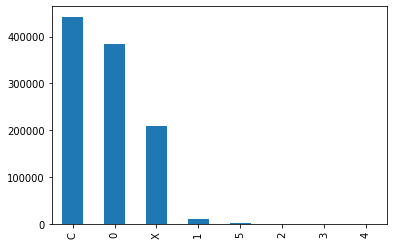

In [28]:
cr["STATUS"].value_counts().plot.bar()
plt.show()

In this part,we create new column which is called **"CUSTOMER_FOR_MONTHS"** ,and shows us that how many months this person is our client.And we also create new dataframe such as **credit_record** to save this data.




In [29]:
cr["CUSTOMER_FOR_MONTHS"]=cr["MONTHS_BALANCE"].apply(lambda x : x*(-1))

In [30]:
credit_record = pd.DataFrame(cr.groupby('ID').agg({'CUSTOMER_FOR_MONTHS' : max}))

In [31]:
credit_record.head()

,CUSTOMER_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


To creating our target column we use **VINTAGE ANALYSIS**. In simple words, the vintage analysis measures the performance of a portfolio in different periods of time after the loan (or credit card) was granted. Performance can be measured in the form of cumulative charge-off rate, proportion of customers 30/60/90 days past due (DPD), utilization ratio, average balance etc.

In [33]:
cr['STATUS'][cr["STATUS"] == 'C'] = 0
cr['STATUS'][cr["STATUS"] == 'X'] = 0
cr.head()


,ID,MONTHS_BALANCE,STATUS,CUSTOMER_FOR_MONTHS
0,5001711,0,0,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,0,0


In [34]:
cr['STATUS']=cr['STATUS'].astype(int)

In [35]:
cr.sort_values(by = 'STATUS',ascending = False,inplace = True)
cr.drop_duplicates(subset = ['ID'],inplace = True)
cr.shape

(45985, 4)

**STATUS column**


> 0 - he/she is **good** client

> 1 - he/she is **bad** client






In [36]:
cr['STATUS'] = cr['STATUS'].apply(lambda x : 1 if x>=1 else 0)
cr.drop(['MONTHS_BALANCE'],axis = 1,inplace = True)
cr.drop(['CUSTOMER_FOR_MONTHS'],axis = 1,inplace = True)
cr.head()

,ID,STATUS
418975,5050603,1
832451,5117313,1
979818,5142362,1
947078,5135636,1
810410,5116036,1


In [37]:
cr["STATUS"].value_counts()

0    40635
1     5350
Name: STATUS, dtype: int64

**Merge the dataframe**


> Here, we merge 3 data sets:

1.   application record as **ar**

2.   credit record as **cr**

3.   **credit record**









In [38]:
df = ar.merge(credit_record, how='inner', on=['ID'])
df = pd.merge(df, cr, on = "ID", how = "inner")


In [39]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,CUSTOMER_FOR_MONTHS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2,33,12.44,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,other,2,33,12.44,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,59,3.11,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,52,8.36,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,52,8.36,26,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  FLAG_WORK_PHONE      36457 non-null  object 
 11  FLAG_PHONE           36457 non-null  object 
 12  FLAG_EMAIL           36457 non-null  object 
 13  OCCUPATION_TYPE      36457 non-null  object 
 14  CNT_FAM_MEMBERS      36457 non-null  int64  
 15  AGE                  36457 non-null 

In [41]:
df.shape

(36457, 19)

In [42]:
df["STATUS"].value_counts()

0    32166
1     4291
Name: STATUS, dtype: int64

In [43]:
df["STATUS"].value_counts(normalize=True)

0    0.8823
1    0.1177
Name: STATUS, dtype: float64

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.00,5042028.0,5074614.0,5115396.00,5150487.00
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.00,0.0,0.0,1.00,19.00
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.00,121500.0,157500.0,225000.00,1575000.00
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.00,2.0,2.0,3.00,20.00
AGE,36457.0,4.377738e+01,11.519211,21.00,34.0,43.0,53.00,69.00
YEARS_EMPLOYED,36457.0,1.744216e+02,371.705946,0.05,3.2,6.9,15.56,1000.67
CUSTOMER_FOR_MONTHS,36457.0,2.616419e+01,16.501854,0.00,12.0,24.0,39.00,60.00
STATUS,36457.0,1.177003e-01,0.322257,0.00,0.0,0.0,0.00,1.00


# **Visualisation**

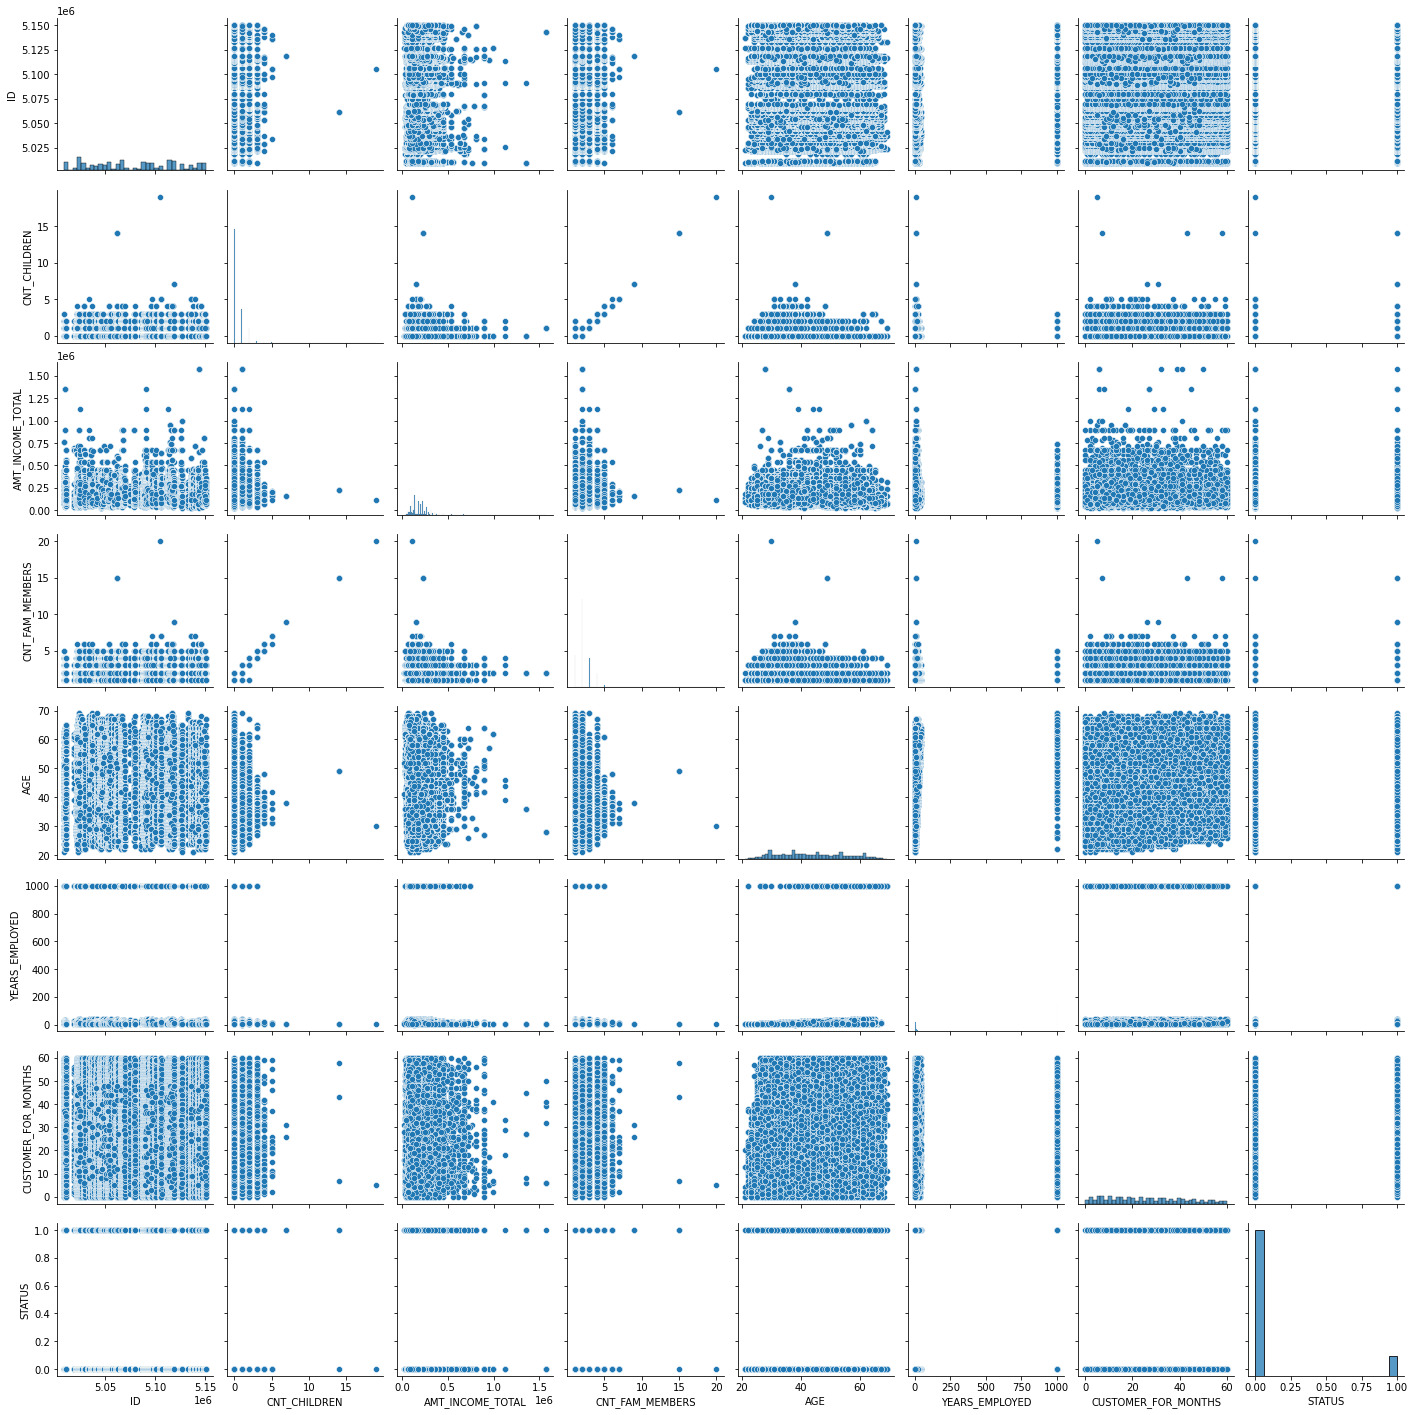

In [45]:
sns.pairplot(df)

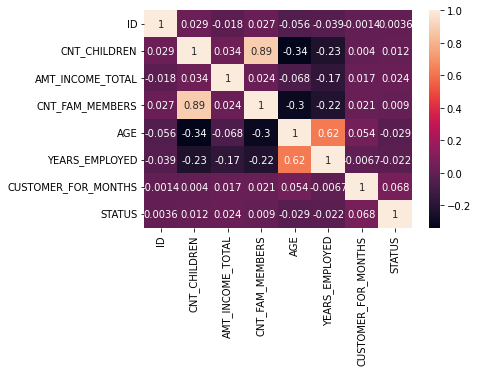

In [46]:
sns.heatmap(df.corr(), annot=True)

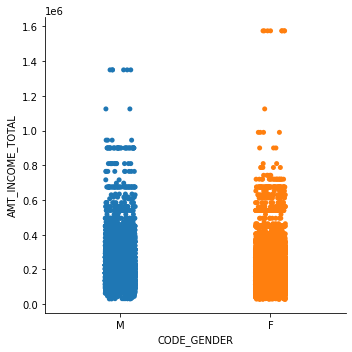

In [47]:
sns.catplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=df)

In [48]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'AGE',
       'YEARS_EMPLOYED', 'CUSTOMER_FOR_MONTHS', 'STATUS'],
      dtype='object')

**Distribution of *STATUS* of clients through *gender,having car and realty,education type,family status,housing type,having phone and email,and occupation type***


> We can easily see that most of the good clients are feminine,and they don't have car but have a realty.Their education type mostly are secondary and higher education and they are married.



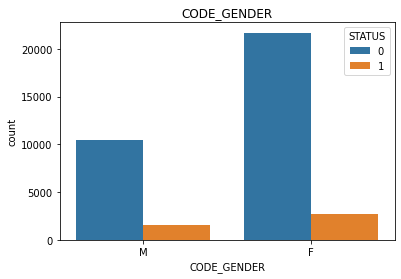

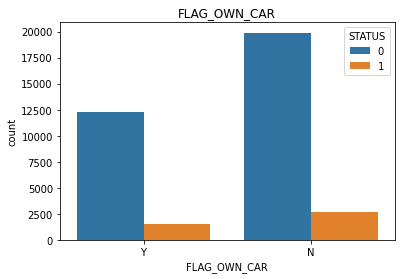

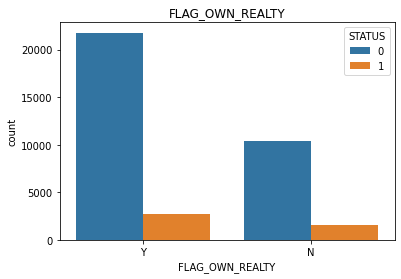

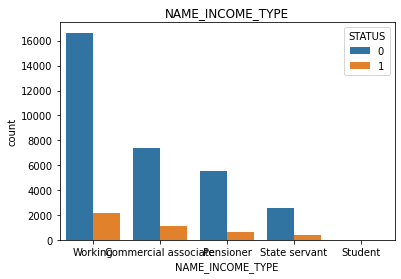

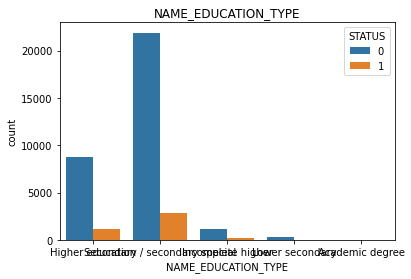

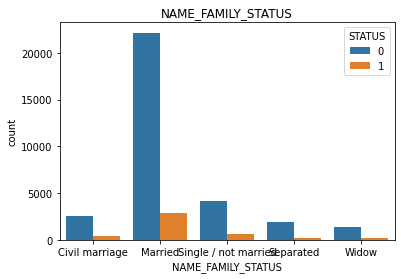

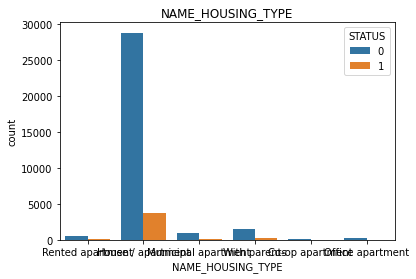

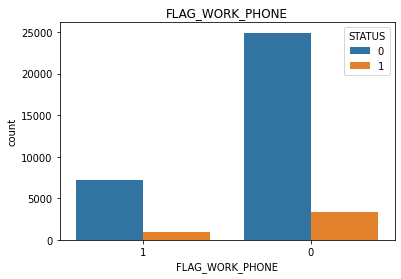

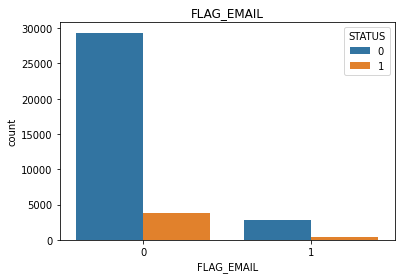

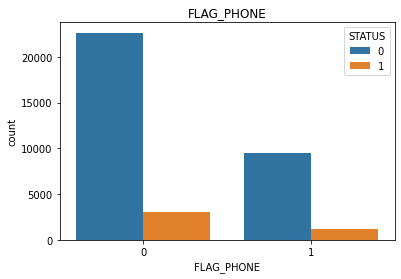

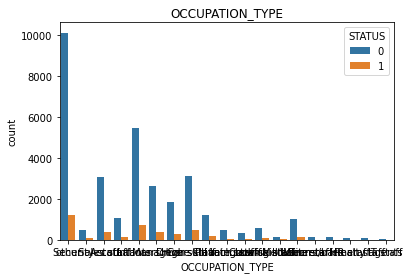

In [49]:
columns=["CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE",'FLAG_WORK_PHONE',"FLAG_EMAIL","FLAG_PHONE","OCCUPATION_TYPE"]
for col in columns:
    if col!='STATUS':
        plt.title(col)
        sns.countplot(x=df[col], data=df,hue="STATUS")
        plt.show()


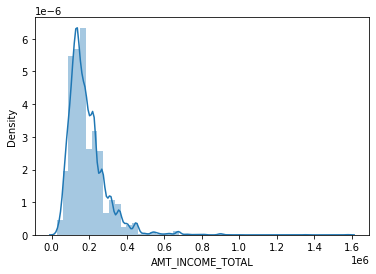

In [50]:
sns.distplot(df.AMT_INCOME_TOTAL, kde=True)

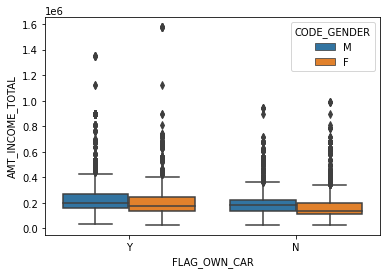

In [51]:
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', data=df,hue='CODE_GENDER')

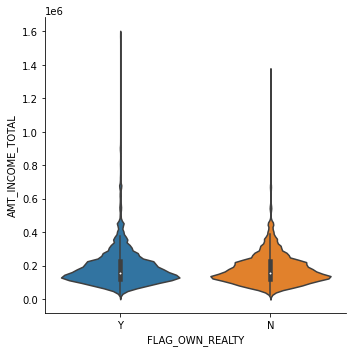

In [52]:
sns.catplot(x='FLAG_OWN_REALTY', y='AMT_INCOME_TOTAL', kind='violin', data=df)

**Analyst of categorical columns**

In [53]:
num_cols=df._get_numeric_data().columns.tolist()
print(num_cols)


['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE', 'YEARS_EMPLOYED', 'CUSTOMER_FOR_MONTHS', 'STATUS']


In [54]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'OCCUPATION_TYPE', 'FLAG_WORK_PHONE', 'NAME_INCOME_TYPE', 'FLAG_PHONE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_EMAIL', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']


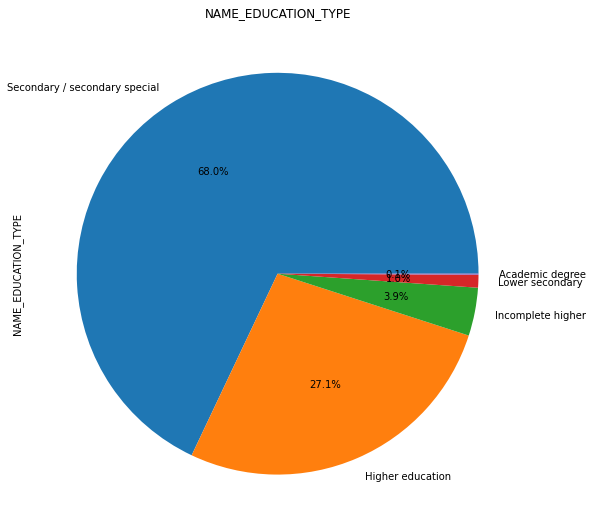

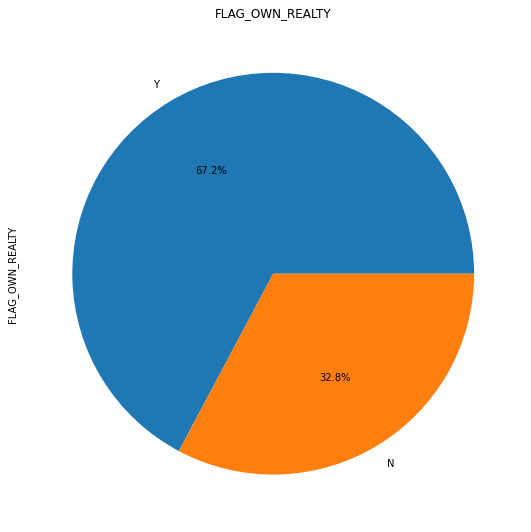

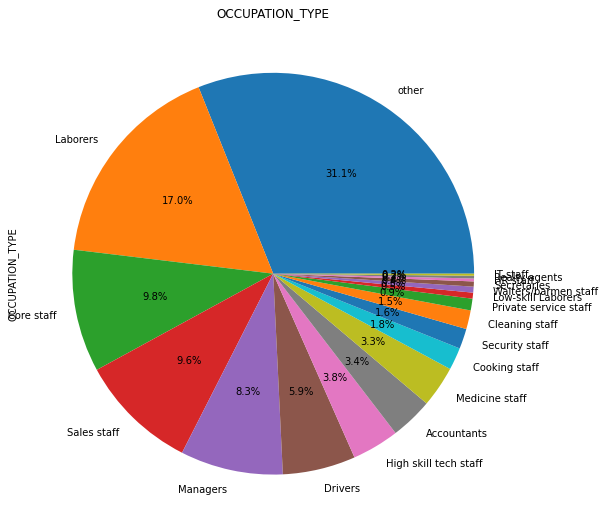

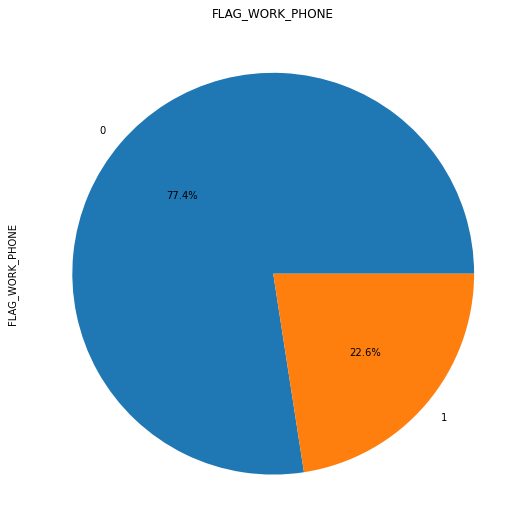

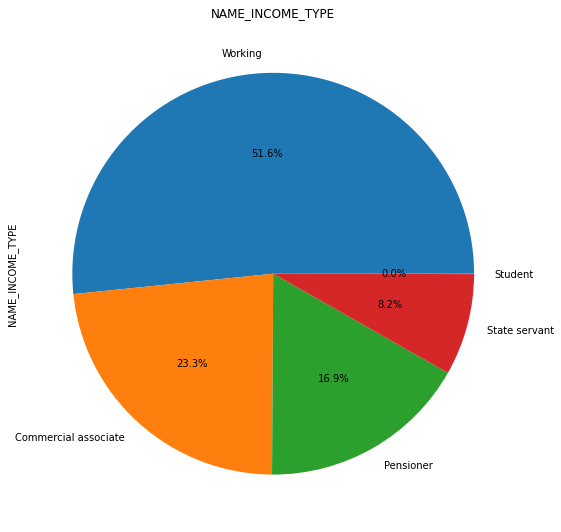

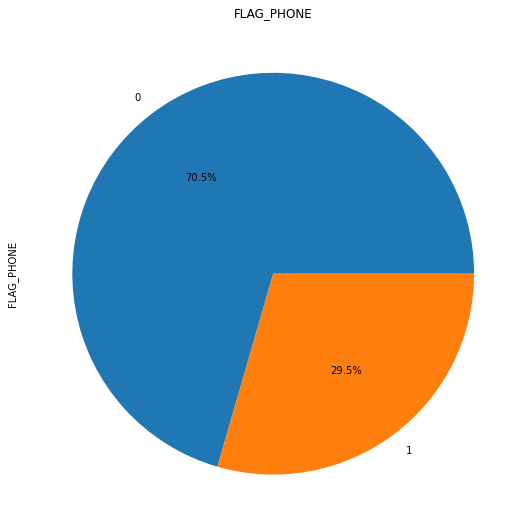

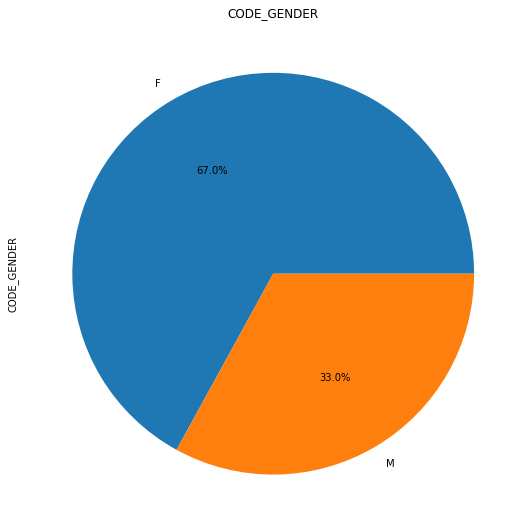

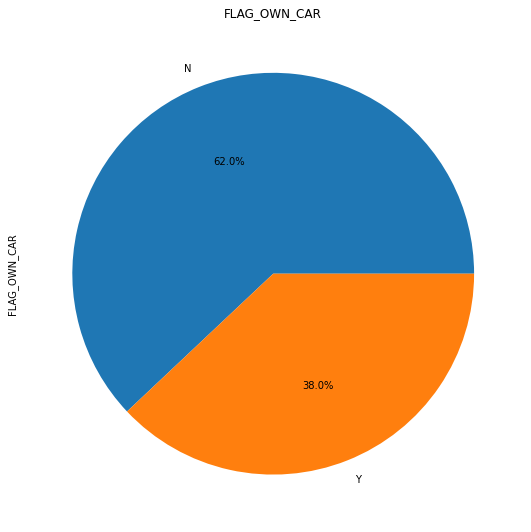

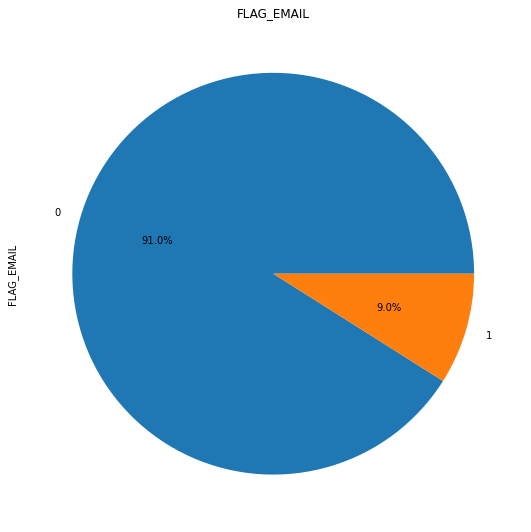

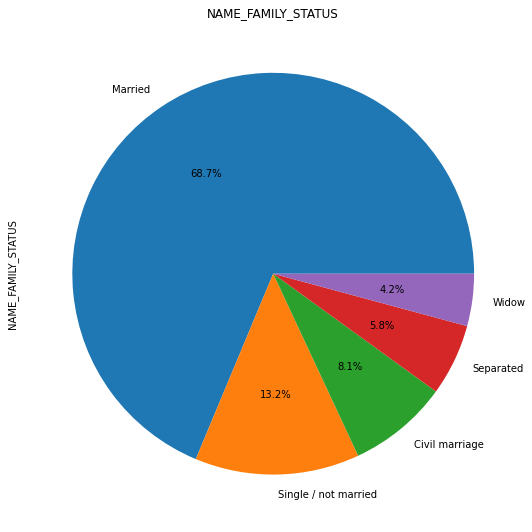

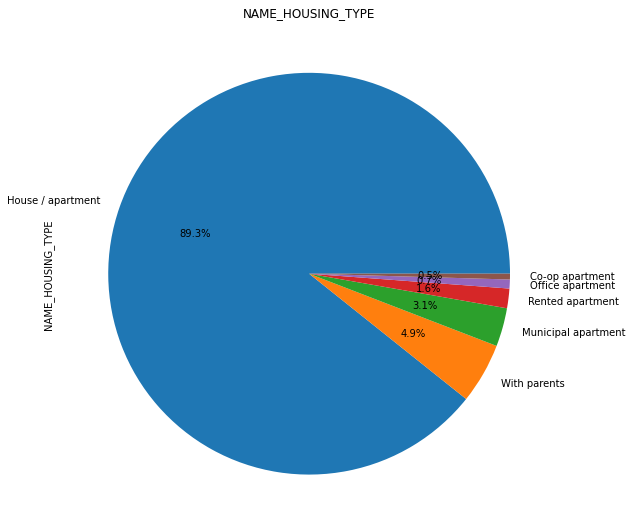

In [55]:
for col in  cat_cols:
    type_value_count = df[col].value_counts(normalize=True)*100
    plt.figure(figsize=(9,10))
    
    ax = plt.subplot(111)
    df[col].value_counts(normalize=True).plot(kind='pie',ax=ax, autopct='%1.1f%%')
    plt.title(col)
    plt.show()

    



# **ML**

# **Standart Scaling and get dummy**

> Before modelling,we need **drop**    "**ID**" column and to do **get_dummies** for converting categorical data into dummy or indicator variables



In [56]:
df.drop('ID', axis=1, inplace=True)
df=pd.get_dummies(df, drop_first=True)


In [57]:
df.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE',
       'YEARS_EMPLOYED', 'CUSTOMER_FOR_MONTHS', 'STATUS', 'CODE_GENDER_M',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'FLAG_WORK_PHONE_1', 'FLAG_PHONE_1', 'FLAG_EMAIL_1',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE

We split our data into train and test sets.Afer that we use **Standard Scaler**
to standardize the data values into a standard format.

In [58]:
X=df.drop('STATUS', axis=1)
Y=df['STATUS']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)


In [59]:
sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [60]:
Y.value_counts()

0    32166
1     4291
Name: STATUS, dtype: int64

# **Model building**
In this part we should try diffrent models to understand which is one better.We use **LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier** and compared results.

In [61]:
def build_model(algo, X, Y,):
    
    model=algo()
    model.fit(X_train, Y_train)
    
    Y_pred=model.predict(X_test)
    
    print(type(model).__name__)
    
    print(classification_report(Y_test, Y_pred))
    
    return accuracy_score(Y_test, Y_pred)

In [62]:
accs=[]
models=[LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier]


In [63]:
for m in models:
    accs.append(build_model(m, X, Y))

LogisticRegression
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10570
           1       1.00      0.01      0.01      1461

    accuracy                           0.88     12031
   macro avg       0.94      0.50      0.47     12031
weighted avg       0.89      0.88      0.82     12031

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10570
           1       0.30      0.30      0.30      1461

    accuracy                           0.83     12031
   macro avg       0.60      0.60      0.60     12031
weighted avg       0.83      0.83      0.83     12031

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10570
           1       0.43      0.15      0.22      1461

    accuracy                           0.87     12031
   macro avg       0.66      0.56      0.57     12031
weighted av

# **SMOTE TOMEK**

> Like in most real cases,our data is **unbalanced**.Thats why,we use oversampling method-**SMOTE Tomek** to increase number of minarty class to balance data for modelling.After that,we use our models on rebalanced data 



In [69]:
os=SMOTETomek(0.75)
X_train_os,y_train_os=os.fit_resample(X_train,Y_train)
print("The number of classes before fit {}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))



The number of classes before fit Counter({0: 21596, 1: 2830})
The number of classes after fit Counter({0: 21013, 1: 15614})


In [70]:
def build_model(algo, X, Y,):
    
    model=algo()
    model.fit(X_train_os, y_train_os)
    
    Y_pred=model.predict(X_test)
    
    print(type(model).__name__)
    
    print(classification_report(Y_test, Y_pred))
    
    return accuracy_score(Y_test, Y_pred)

In [71]:
accs=[]
models=[LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier]

In [72]:
for m in models:
    accs.append(build_model(m, X, Y))

LogisticRegression
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     10570
           1       0.16      0.23      0.19      1461

    accuracy                           0.75     12031
   macro avg       0.52      0.53      0.52     12031
weighted avg       0.80      0.75      0.77     12031

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     10570
           1       0.30      0.35      0.32      1461

    accuracy                           0.82     12031
   macro avg       0.60      0.62      0.61     12031
weighted avg       0.83      0.82      0.83     12031

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     10570
           1       0.25      0.51      0.34      1461

    accuracy                           0.76     12031
   macro avg       0.59      0.65      0.60     12031
weighted av

# **Model Tuning RandomForestClassifier**


In [74]:
rf_param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

model=RandomForestClassifier()

clf = GridSearchCV(model, param_grid=rf_param_grid, 
                       cv = StratifiedKFold(n_splits = 5), scoring = "accuracy", n_jobs = -1,verbose = 1)

clf.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 15, 25],
                         'max_features': [3, 5, 10, 20],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [75]:
clf.best_estimator_


RandomForestClassifier(max_depth=25, max_features=10, min_samples_split=3,
                       n_estimators=300)

In [76]:
final_model=clf.best_estimator_

final_model.fit(X_train_os,y_train_os)
Y_pred=final_model.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10570
           1       0.46      0.30      0.36      1461

    accuracy                           0.87     12031
   macro avg       0.69      0.62      0.65     12031
weighted avg       0.85      0.87      0.86     12031



# **Model Tuning for KNN**


In [77]:
knn_params={'n_neighbors':np.arange(1, 50)}

knn=KNeighborsClassifier()

knn_cv=GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train_os, y_train_os)

print(knn_cv.best_params_)

{'n_neighbors': 1}


In [78]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_os,y_train_os)
Y_pred=model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90     10570
           1       0.32      0.40      0.35      1461

    accuracy                           0.82     12031
   macro avg       0.62      0.64      0.63     12031
weighted avg       0.84      0.82      0.83     12031

